In [1]:
import numpy as np
from numpy.fft import fft
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
plt.style.use('dark_background')

from import_raw_advanced import *

# Acceleration

In [2]:
# driver's head
base = "/Users/lionelpeer/polybox/ETH/HS21/EMFelderimAlltag/Messungen/Messungen2/Beschl/"

measurement = base + "2021-11-26_Beschl_Kopf_Fahrer"
head_time, head_freq = data_import(measurement)

# center console
base = "/Users/lionelpeer/polybox/ETH/HS21/EMFelderimAlltag/Messungen/Messungen1/Beschleunigung/"

measurement = base + "2021-11-04_20-41-33_Beschl"
console_time, console_freq = data_import(measurement)

# foot space Beifahrer
measurement = base + "2021-11-05_19-21-33_Beschl2"
foot_time, foot_freq = data_import(measurement)

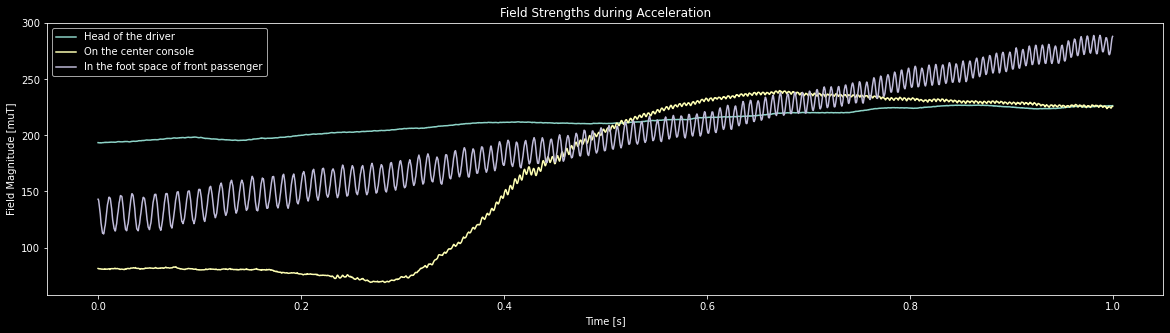

In [3]:
fig, ax = plt.subplots(figsize=(20,5))
ax.set_title('Field Strengths during Acceleration')
ax.set_xlabel('Time [s]')
ax.set_ylabel('Field Magnitude [muT]')
plot_head = ax.plot(head_time[:,0], head_time[:,4], label='Head of the driver')
plot_console = ax.plot(head_time[:,0], console_time[:,4], label='On the center console')
plot_foot = ax.plot(head_time[:,0], foot_time[:,4], label='In the foot space of front passenger')
ax.legend()

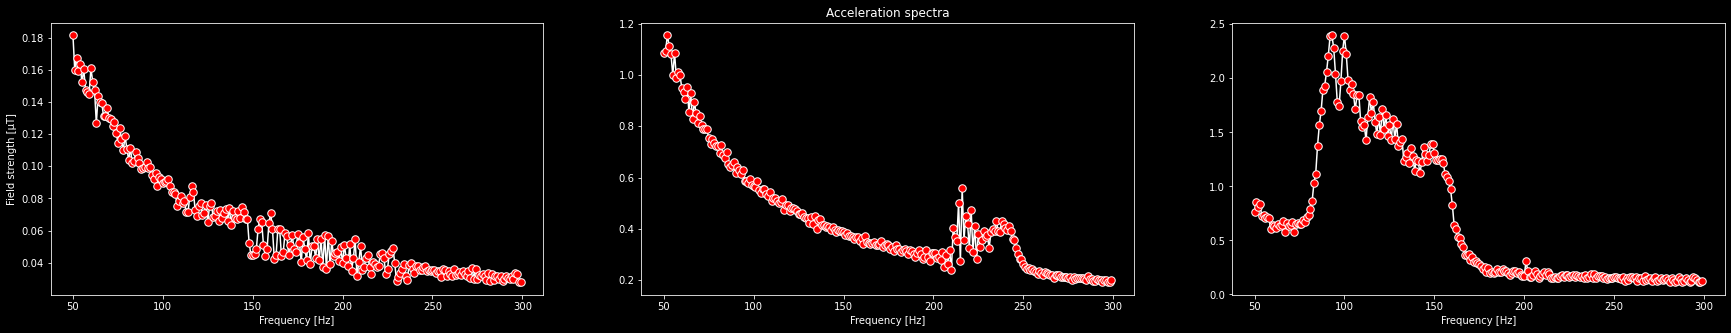

In [41]:
WOI_head = np.s_[50:300] # frequency window of interest: DC fields carry too much signal
WOI_console = np.s_[50:300]
WOI_foot = np.s_[50:300]

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(30,5))
ax2.set_title("Acceleration spectra")
ax1.set_xlabel("Frequency [Hz]")
ax2.set_xlabel("Frequency [Hz]")
ax3.set_xlabel("Frequency [Hz]")
ax1.set_ylabel("Field strength [μT]")
ax1.plot(head_freq[WOI_head,0], head_freq[WOI_head,4], color='white', marker='.', markerfacecolor='red', markersize=15)
ax2.plot(console_freq[WOI_console,0], console_freq[WOI_console,4], color='white', marker='.', markerfacecolor='red', markersize=15)
ax3.plot(foot_freq[WOI_foot,0], foot_freq[WOI_foot,4], color='white', marker='.', markerfacecolor='red', markersize=15)

# Acceleration vs limit values

In [44]:
base = "/Users/lionelpeer/polybox/ETH/HS21/EMFelderimAlltag/Messungen/Messungen1/Beschleunigung/"

measurement = base + "2021-11-05_19-21-33_Beschl_Fussraum_limitvalues"
limit_time, limit_freq = data_import(measurement)

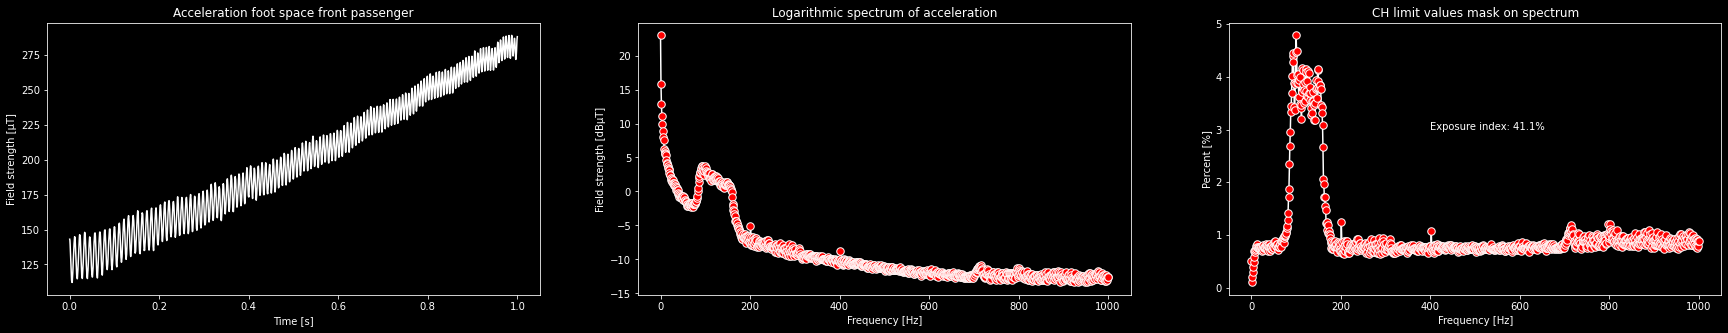

In [62]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(30,5))
ax1.set_title("Acceleration foot space front passenger")
ax2.set_title("Logarithmic spectrum of acceleration")
ax3.set_title("CH limit values mask on spectrum")
ax1.set_xlabel("Time [s]")
ax2.set_xlabel("Frequency [Hz]")
ax3.set_xlabel("Frequency [Hz]")
ax1.set_ylabel("Field strength [μT]")
ax2.set_ylabel("Field strength [dBμT]")
ax3.set_ylabel("Percent [%]")
ax3.annotate("Exposure index: 41.1%", (400,3))
ax1.plot(limit_time[:,0], limit_time[:,4], color='white')
ax2.plot(foot_freq[:,0], 10*np.log10(foot_freq[:,4]), color='white', marker='.', markerfacecolor='red', markersize=15)
ax3.plot(limit_freq[:,0], limit_freq[:,4], color='white', marker='.', markerfacecolor='red', markersize=15)

# Charging

In [72]:
base = "/Users/lionelpeer/polybox/ETH/HS21/EMFelderimAlltag/Messungen/Messungen2/Laden112kW/"

measurement = base + "2021-11-26_11-29-01_112kW_direkt_auf_Kabel_MaskCH"
dccharging_limit_time, dccharging_limit_spec = data_import(measurement)

base = "/Users/lionelpeer/polybox/ETH/HS21/EMFelderimAlltag/Messungen/Messungen1/Laden22kW/"

measurement = base + "2021-11-05_18_42_21_22kW_direkt_auf_Kabel_limitvalues"
accharging_limit_time, accharging_limit_spec = data_import(measurement)

Text(600, 25, 'Exposure index: 111.8%')

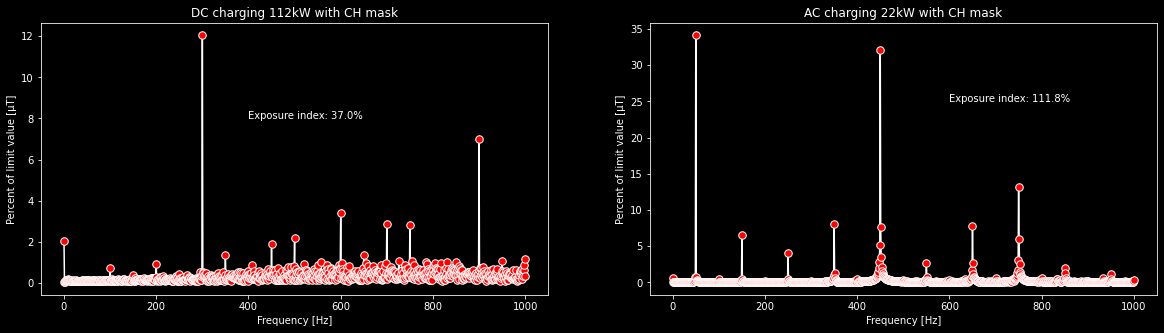

In [76]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20,5))
ax1.set_title("DC charging 112kW with CH mask")
ax2.set_title("AC charging 22kW with CH mask")
ax1.set_xlabel("Frequency [Hz]")
ax2.set_xlabel("Frequency [Hz]")
ax1.set_ylabel("Percent of limit value [μT]")
ax2.set_ylabel("Percent of limit value [μT]")
ax1.plot(dccharging_limit_spec[:,0], dccharging_limit_spec[:,4], color='white', marker='.', markerfacecolor='red', markersize=15)
ax2.plot(accharging_limit_spec[:,0], accharging_limit_spec[:,4], color='white', marker='.', markerfacecolor='red', markersize=15)
ax1.annotate("Exposure index: 37.0%", (400, 8))
ax2.annotate("Exposure index: 111.8%", (600,25))